In [1]:
#importing necessary libraries
import pandas as pd
import datetime as dt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

"""The line magic command %matplotlib inline enables the drawing of matplotlib figures
in the IPython environment. Once this command is executed in any cell, then 
for the rest of the session, the matplotlib plotswill appear directly below 
the cell in which the plot function was called."""
%matplotlib inline

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [2]:
#creating dataframe for Crash data
df_Crash = pd.read_csv("Data/traffic.csv")

#inspecting first few rows
df_Crash.head()


,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


In [3]:
#inspecting first and last five rows
df_Crash

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring
...,...,...,...
175,2020-08-01,136.815697,Summer
176,2020-09-01,135.752824,Fall
177,2020-10-01,159.273228,Fall
178,2020-11-01,141.305140,Fall


In [4]:
#inspecting data types
df_Crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              180 non-null    object 
 1   Crashes_per_100k  180 non-null    float64
 2   Season            180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [5]:
df_Crash.dtypes

Date                 object
Crashes_per_100k    float64
Season               object
dtype: object

In [6]:
#converting Data to date format inorder to use it in a time series
df_Crash["Date"] = df_Crash["Date"].astype("datetime64[ns]")

#[ns] means the nano second based time format that specifies the precision of the Datetime object


In [7]:
df_Crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [8]:
#alternative way of converting to the date format
df_Crash["Date"] = pd.to_datetime(df_Crash["Date"])

#converted in the [ns] format

In [9]:
df_Crash.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


Text(0.5, 1.0, 'Time Series (2006-2020)')

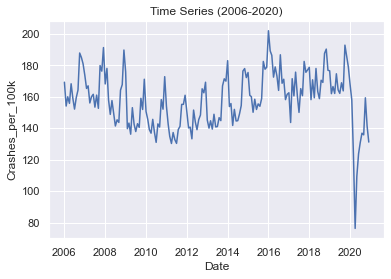

In [10]:
#Visualizing traffic safety data using line plot in seaborn
sns.lineplot( data = df_Crash, x="Date", y = "Crashes_per_100k")
plt.title("Time Series (2006-2020)")

Looking at the line plot of our collision data, we can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years.
    
There also appear to be cyclical patterns. There is a fair amount of variance in the number of collisions occurring throughout the year. We might hypothesize that the number of collisions increases or decreases during different seasons.

<Axes: xlabel='Crashes_per_100k', ylabel='Season'>

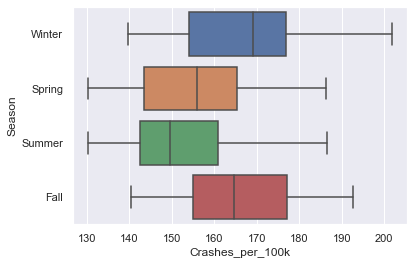

In [11]:
#Visualizing crash rates in different season usine boxplot in seaborn
#Removing anomolous 2020 data 

sns.boxplot(data = df_Crash[df_Crash.Date.dt.year !=2020], x = "Crashes_per_100k", y="Season")


The Season column with similar values and their corresponding Crash_per_100k colume valus are analyzed to find the quartiles, maximum values and minimum values. 

Winter and Fall appear to have generally higher crash rates than Spring and Summer. Seasons may be the reason for the pattern in crash rates.

In [12]:
#creating dataframe for smartphone usage data
df_Smartphone = pd.read_csv("Data/crashes_smartphones.csv")

#inspecting first few rows
df_Smartphone.tail()


,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
23,Oct-13,166.837970,Fall,10/6/13,58
24,Sep-12,148.319570,Fall,9/6/12,45
25,Sep-12,148.319570,Fall,9/23/12,43
26,Sep-13,144.768106,Fall,9/16/13,54
27,Sep-13,144.768106,Fall,9/30/13,55


In [13]:
#removing redundant column
#df_Crash.drop(["Month_Year"], axis=1)


In [14]:
#converting Data to date format inorder to use it in a time series
df_Smartphone["Smartphone_Survey_Date"] = pd.to_datetime(df_Smartphone["Smartphone_Survey_Date"])

df_Smartphone.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              28 non-null     object        
 1   Crashes_per_100k        28 non-null     float64       
 2   Season                  28 non-null     object        
 3   Smartphone_Survey_Date  28 non-null     datetime64[ns]
 4   Smartphone_usage        28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


Text(0.5, 1.0, 'Time Series (2012-2019)')

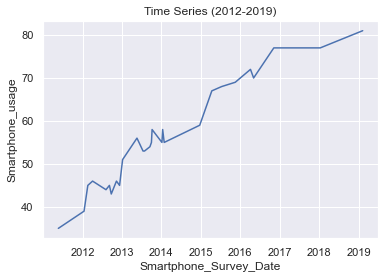

In [15]:
#Visualizing Smartphone Usage data using line plot in seaborn
sns.lineplot(data = df_Smartphone, x = "Smartphone_Survey_Date", y = "Smartphone_usage")
plt.title("Time Series (2012-2019)")

<Axes: xlabel='Smartphone_usage', ylabel='Crashes_per_100k'>

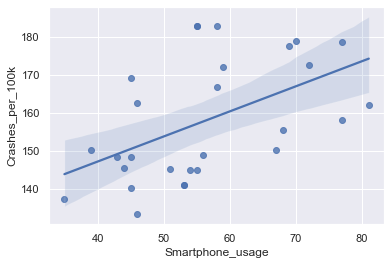

In [16]:
#Scatterplot with regression line
sns.regplot(x = "Smartphone_usage", y = 'Crashes_per_100k', data = df_Smartphone)


In [17]:
#Checking Pearson's r correlation coefficient and the associated p-value

#finding Pearson's r and p-value
corr, p = stats.pearsonr(df_Smartphone.Smartphone_usage, df_Smartphone.Crashes_per_100k)

print(f'''Pearson's r = {round(corr,3)} #Rounding to 3 decimal place
p = {round(p,3)}''')


Pearson's r = 0.513 #Rounding to 3 decimal place
p = 0.005


The coefficient of correlation (-1 <= r <= 1) is greater than 0.5, which indicates a moderately positive relationship, and linear regression can be still used to predict future values. 

The p-value is also less than 0.05.

Thus, it tells us that there is a significant correlation between smartphone usage and car crash rates in the U.S. 

Note: Many other factors may be contributing to the rise in car crash rates from 2011 to 2019.



In [18]:
#Converting columns to arrays

x = df_Smartphone["Smartphone_usage"].to_numpy().reshape(-1,1)
y = df_Smartphone["Crashes_per_100k"].to_numpy().reshape(-1,1)

#linear regression model
linModel = LinearRegression()

linModel.fit(x,y)


LinearRegression()

In [19]:
print(f'''y intercept = {linModel.intercept_}
coefficient = {linModel.coef_}''')

y intercept = [120.6637106]
coefficient = [[0.66103316]]


In [31]:
#get the smartphone usage rate from 2019
testdata = (df_Smartphone[df_Smartphone['Month_Year'] == "Feb-19"].Smartphone_usage).to_numpy().reshape(-1,1)

#Make prediction
linModel_pred = linModel.predict(testdata)#requires 2D array so reshaped testData

print(linModel_pred)

predictedVal = linModel_pred[0][0]

[[174.20739643]]


In [32]:
#Actual Crash Rate on Feb 2019
actualdata = (df_Crash[df_Crash['Date'] == pd.to_datetime("2019-02-01")].Crashes_per_100k).to_numpy().reshape(-1,1)

print(actualdata)

actualVal = actualdata[0][0]

[[161.88653979]]


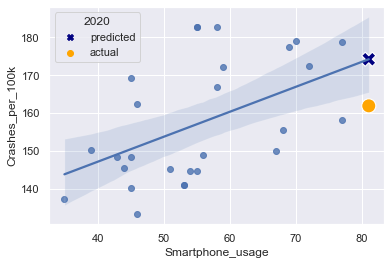

In [34]:
# recreate the regression plot we made earlier
sns.regplot(data = df_Smartphone, x = 'Smartphone_usage', y = 'Crashes_per_100k')


# add a scatter plot layer to show the actual and predicted 2020 values
sns.scatterplot(x = [testdata[0][0],testdata[0][0]], y = [predictedVal,actualVal], 
                hue = ['predicted','actual'], style= ['predicted','actual'], 
                markers = ['X','o'], palette=['navy','orange'], s=200)

# add legend title
plt.legend(title='2020')
plt.show()

In [35]:
'''Calculate Model Accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np'''

#print(f"""Root Mean Squared Error = {np.sqrt(mean_squared_error(actualdata,linModel_pred))}
#Rˆ2 = {r2_score(actualdata,linModel_pred)}""")


'Calculate Model Accuracy\nfrom sklearn.metrics import r2_score, mean_squared_error\nimport numpy as np'

More than two samples required to check the accuracy 

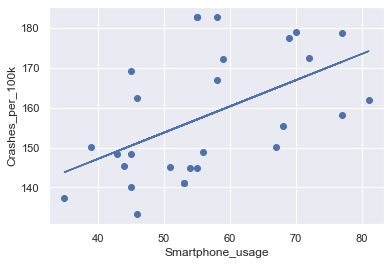

In [36]:
#alternative

x = df_Smartphone.Smartphone_usage
y = df_Smartphone.Crashes_per_100k

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.xlabel("Smartphone_usage")
plt.ylabel("Crashes_per_100k")

plt.scatter(x,y)
plt.plot(x, mymodel)


In [37]:
print(f'''Pearson's r = {round(corr,3)}
p = {round(p,3)}''')

Pearson's r = 0.513
p = 0.005


In [38]:
print(f'''y intercept = {intercept}
coefficient = {slope}''')

y intercept = 120.66371060130245
coefficient = 0.6610331584159462
